# Exploratory data analysis

## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read in clean data

In [2]:
complaints_df = pd.read_csv('~/documents/data/consumer_complaints/consumer_complaints_clean.csv', index_col = 0)

## Investigate data

In [3]:
complaints_df.shape

(113958, 6)

In [4]:
complaints_df.head()

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company
57729,Credit card,NaN,Other,NaN,Received Capital One charge card offer XXXX. A...,Capital One
57787,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted me after I asked not to,I do n't know how they got my cell number. I t...,"CCS Financial Services, Inc."
57838,Credit card,NaN,Rewards,NaN,I 'm a longtime member of Charter One Bank/RBS...,"Citizens Financial Group, Inc."
57848,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,"After looking at my credit report, I saw a col...",Experian
57852,Debt collection,Payday loan,Improper contact or sharing of info,Talked to a third party about my debt,I received a call from a XXXX XXXX from XXXX @...,"Big Picture Loans, LLC"


### Product

In [5]:
complaints_df['Product'].nunique()

12

In [6]:
complaints_df['Product'].unique()

array(['Credit card', 'Debt collection', 'Credit reporting',
       'Student loan', 'Mortgage', 'Payday loan',
       'Bank account or service', 'Consumer Loan', 'Money transfers',
       'Prepaid card', 'Other financial service', 'Virtual currency'],
      dtype=object)

In [7]:
complaints_df['Product'].value_counts()

Debt collection            28731
Mortgage                   24631
Credit reporting           21626
Credit card                13567
Bank account or service    10419
Consumer Loan               6392
Student loan                4946
Payday loan                 1244
Prepaid card                1143
Money transfers             1073
Other financial service      175
Virtual currency              11
Name: Product, dtype: int64

### Sub-product

In [8]:
complaints_df['Sub-product'].nunique()

46

In [9]:
complaints_df['Sub-product'].unique()[0:10]

array([nan, 'Other (i.e. phone, health club, etc.)', 'Payday loan',
       'Non-federal student loan', 'Medical', 'Mortgage', 'FHA mortgage',
       'Other mortgage', 'I do not know', 'Credit card'], dtype=object)

In [10]:
complaints_df['Sub-product'].value_counts()[0:10]

Conventional fixed mortgage               10893
Other (i.e. phone, health club, etc.)      8746
Checking account                           7147
I do not know                              6005
Credit card                                5526
Medical                                    4669
FHA mortgage                               4537
Non-federal student loan                   3892
Conventional adjustable mortgage (ARM)     3876
Vehicle loan                               3489
Name: Sub-product, dtype: int64

### Issue

In [11]:
complaints_df['Issue'].nunique()

90

In [12]:
complaints_df['Issue'].unique()[0:10]

array(['Other', 'Improper contact or sharing of info', 'Rewards',
       'Incorrect information on credit report',
       'Dealing with my lender or servicer',
       "Cont'd attempts collect debt not owed", "Can't repay my loan",
       'Communication tactics',
       'Loan servicing, payments, escrow account',
       'Disclosure verification of debt'], dtype=object)

In [13]:
complaints_df['Issue'].value_counts()[0:10]

Incorrect information on credit report      14578
Cont'd attempts collect debt not owed       12227
Loan servicing, payments, escrow account    10940
Loan modification,collection,foreclosure     8348
Disclosure verification of debt              5119
Account opening, closing, or management      4483
Communication tactics                        4363
Credit reporting company's investigation     3601
Dealing with my lender or servicer           3538
Managing the loan or lease                   2950
Name: Issue, dtype: int64

### Sub-issue

In [14]:
complaints_df['Sub-issue'].nunique()

64

In [15]:
complaints_df['Sub-issue'].unique()[0:10]

array([nan, 'Contacted me after I asked not to',
       'Information is not mine', 'Talked to a third party about my debt',
       'Having problems with customer service', 'Debt was paid',
       'Debt resulted from identity theft',
       "Can't decrease my monthly payments",
       'Threatened to take legal action',
       'Not given enough info to verify debt'], dtype=object)

In [16]:
complaints_df['Sub-issue'].value_counts()[0:10]

Debt is not mine                        7138
Information is not mine                 4675
Account status                          3810
Debt was paid                           3332
Not given enough info to verify debt    2912
Frequent or repeated calls              2470
Account terms                           1963
Attempted to collect wrong amount       1942
Right to dispute notice not received    1770
Public record                           1750
Name: Sub-issue, dtype: int64

### Company

In [17]:
complaints_df['Company'].nunique()

2748

In [18]:
complaints_df['Company'].unique()[0:10]

array(['Capital One', 'CCS Financial Services, Inc.',
       'Citizens Financial Group, Inc.', 'Experian',
       'Big Picture Loans, LLC', 'Oliphant Financial Corporation',
       'Collection Consultants of California', 'Discover',
       'Stellar Recovery Inc.', 'Citibank'], dtype=object)

In [19]:
complaints_df['Sub-issue'].value_counts()[0:10]

Debt is not mine                        7138
Information is not mine                 4675
Account status                          3810
Debt was paid                           3332
Not given enough info to verify debt    2912
Frequent or repeated calls              2470
Account terms                           1963
Attempted to collect wrong amount       1942
Right to dispute notice not received    1770
Public record                           1750
Name: Sub-issue, dtype: int64

### Consumer complaints narrative

The 'Consumer complaints narrative' column is the key feature column. It is on this column that I will implement natural language processing techniques to make predictions regarding the complaint issue.

In [20]:
complaints_df['Consumer complaint narrative'].nunique()

112690

#### Length of complaint

In [21]:
complaints_df['complaint_length'] = [len(complaint) for complaint in complaints_df['Consumer complaint narrative']]

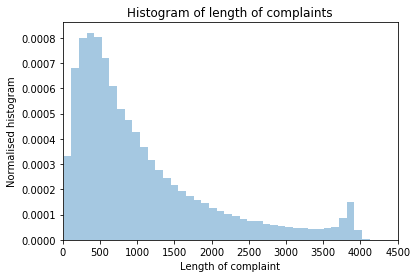

In [22]:
sns.distplot(complaints_df['complaint_length'], norm_hist = True, kde = False)
plt.xlim([0, 4500])
plt.title('Histogram of length of complaints')
plt.ylabel('Normalised histogram')
plt.xlabel('Length of complaint')
plt.show()

In [23]:
complaints_df['complaint_length'].describe()

count    113958.000000
mean       1054.984714
std         920.048902
min          10.000000
25%         396.000000
50%         749.000000
75%        1408.000000
max        5153.000000
Name: complaint_length, dtype: float64

### Number of words in complaint

In [24]:
complaints_df['num_words_in_complaint'] = [len(complaint.split(' ')) + 1 for complaint \
                                     in complaints_df['Consumer complaint narrative']]

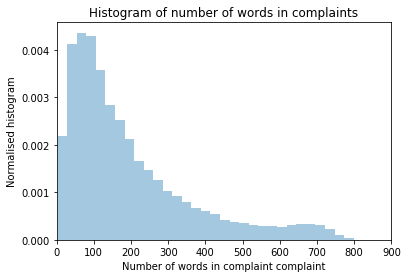

In [28]:
sns.distplot(complaints_df['num_words_in_complaint'], norm_hist = True, kde = False)
plt.xlim([0, 900])
plt.title('Histogram of number of words in complaints')
plt.ylabel('Normalised histogram')
plt.xlabel('Number of words in complaint complaint')
plt.show()

In [26]:
complaints_df['num_words_in_complaint'].describe()

count    113958.000000
mean        195.083285
std         168.549647
min           3.000000
25%          74.000000
50%         139.000000
75%         260.000000
max        1286.000000
Name: num_words_in_complaint, dtype: float64